<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/Radiozavod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Radiozavod" supermarketidagi savdo holati


In [88]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [89]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/Radiozavod.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,AXA 350GR 30%LI XLOPYA NATURALNIE,Shirinliklar,3.55,2019-04-27,True
1,KENT 200GR MISIR NISASTASI,Ziravorlar,1.45,2019-04-27,True
2,BEREKETLI RUZI 20GR TORT MUNCUGU POSET,Ziravorlar,1.85,2019-04-27,True
3,CAVENDISH&HARVEY 50GR MANPASI LEMON DROPS D/Q,Shirinliklar,2.10,2019-03-05,True
4,VESTA 350GR LOKUM KARISIK MEYVELI,Shirinliklar,3.65,2019-03-05,True
5,SMILE LIGHT 60W A55 LAMPA,Maishiy buyumlar,0.72,2019-03-05,True
6,SOKOLAD ULDUZ KOROVKA SUDLU BUKME KG,Shirinliklar,4.15,2019-03-05,True
7,DIET.PETRODIET 200GR KONFET LESNAYA SKAZKA,Diabet mahsulotlari,4.30,2019-10-27,False
8,OLMECA 0.5LT TEKILA BLANCO,"Viski, tekila va h.k",31.18,2019-10-27,False
9,DANONE DANISSIMO 130GR KESMIK FISTASKOVOYE MOROJ.,Yogurt,1.65,2019-10-27,False


In [90]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20728 entries, 0 to 20727
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20728 non-null  object 
 1   mahsulot_turi   20728 non-null  object 
 2   mahsulot_narhi  20728 non-null  float64
 3   sotilgan_vaqti  20728 non-null  object 
 4   bonus_karta     20728 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 668.1+ KB


In [91]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [93]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20728 entries, 0 to 20727
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20728 non-null  object        
 1   mahsulot_turi   20728 non-null  object        
 2   mahsulot_narhi  20728 non-null  float64       
 3   sotilgan_vaqti  20728 non-null  datetime64[ns]
 4   bonus_karta     20728 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 668.1+ KB


In [94]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2039
2103
2023
1832
2145
1989
2172
2130
1991
2294
10
0


In [95]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2039
2103
2023
1832
2145
1989
2172
2130
1991
2294
0
0


In [96]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,AXA 350GR 30%LI XLOPYA NATURALNIE,Shirinliklar,3.55,2019-04-27,True
1,KENT 200GR MISIR NISASTASI,Ziravorlar,1.45,2019-04-27,True
2,BEREKETLI RUZI 20GR TORT MUNCUGU POSET,Ziravorlar,1.85,2019-04-27,True
3,CAVENDISH&HARVEY 50GR MANPASI LEMON DROPS D/Q,Shirinliklar,2.10,2019-03-05,True
4,VESTA 350GR LOKUM KARISIK MEYVELI,Shirinliklar,3.65,2019-03-05,True
...,...,...,...,...,...
20723,SHAIGH TEA 500GR SEYLON CAY QARA FBOP QUTU,Choy,8.90,2019-04-03,False
20724,SABUN QABI,Maishiy buyumlar,0.75,2019-04-03,False
20725,ZOLOTOY VEK 270GR HALVA VANILNAYA,Shirinliklar,0.93,2019-04-03,False
20726,BIZIM TARLA 680GR XARDALLI XIYAR TURSUSU S/Q,Konservalangan sabzavotlar,2.50,2019-04-03,False


In [97]:
#9 2019-yilda "Radiozavod" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4820
Maishiy buyumlar,1158
"Yuvish vositalari, tozalagichlar",1020
Mevali sharbatlar,992
Idish-tovoq,760
...,...
Kefir,21
Muzlatilgan mahsulotlar,10
Tayyor ovqatlar,10
Shampan,9


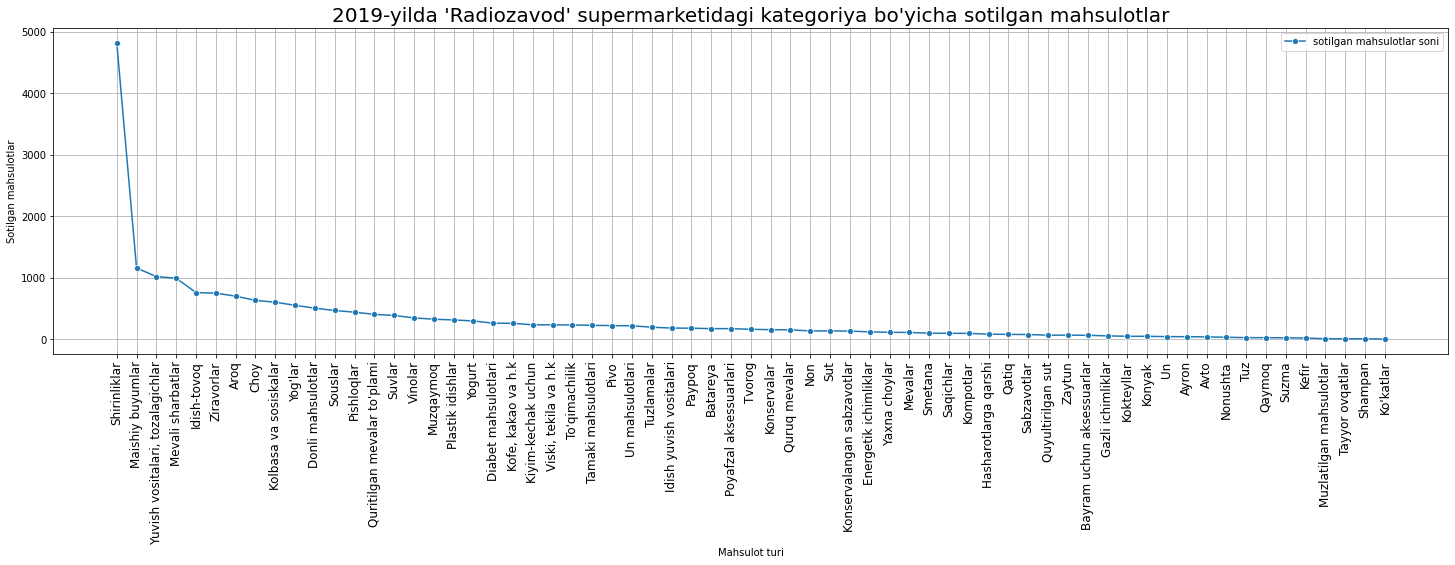

In [98]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Radiozavod' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [99]:
#10 2019-yilda "Radiozavod" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10371.88
Avto,199.14
Ayron,26.76
Batareya,890.27
Bayram uchun aksessuarlar,178.31
...,...
Yog'lar,4874.38
Yogurt,398.21


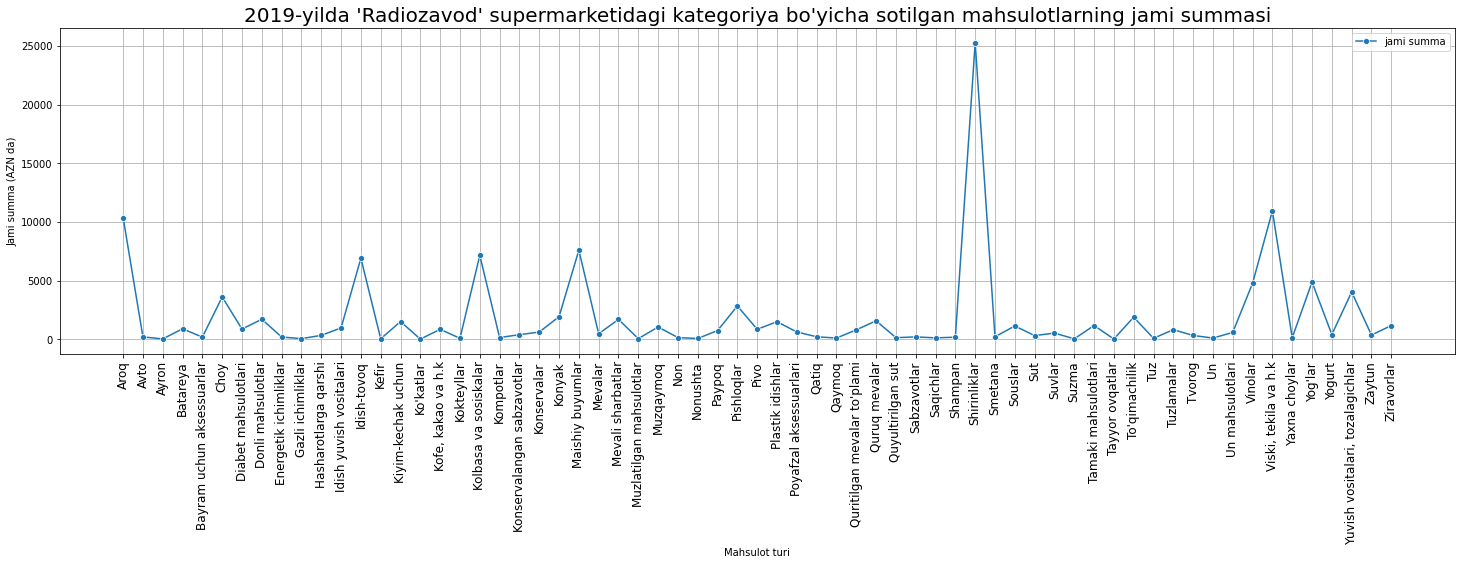

In [100]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Radiozavod' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [101]:
#11 2019-yilda "Radiozavod" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10486,10232


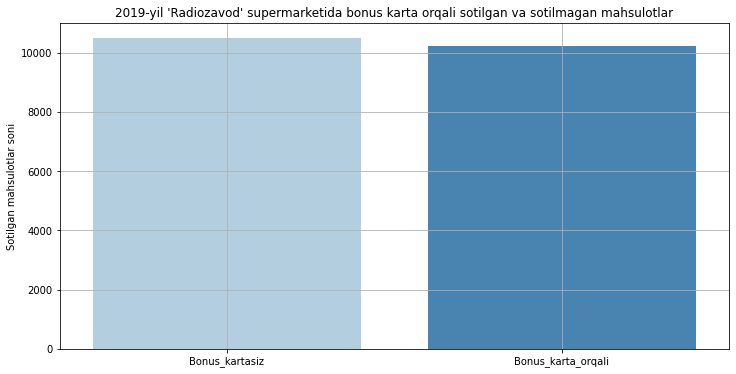

In [102]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Radiozavod' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [103]:
#12 2019-yilda "Radiozavod" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2039
Fevral,2103
Mart,2023
Aprel,1832
May,2145
Iyun,1989
Iyul,2172
Avgust,2130
Sentabr,1991
Oktabr,2294


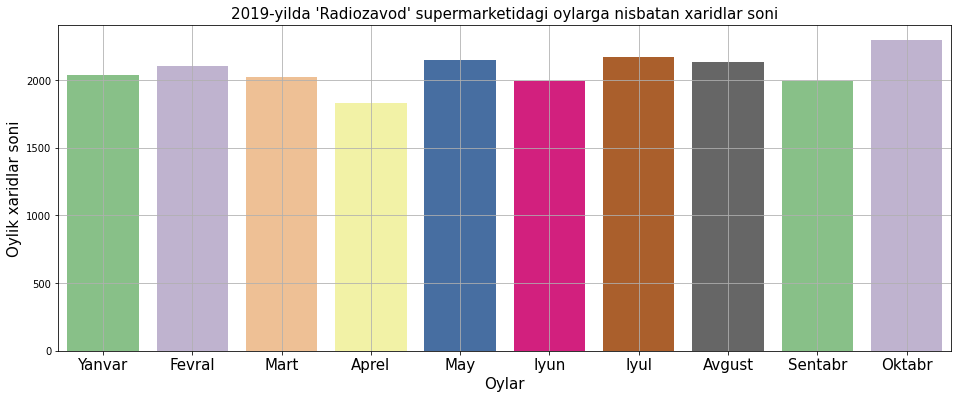

In [104]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Radiozavod' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [105]:
#13 2019-yilda "Radiozavod" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,2947
Seshanba,3035
Chorshanba,3026
Payshanba,2916
Juma,3170
Shanba,2618
Yakshanba,3006


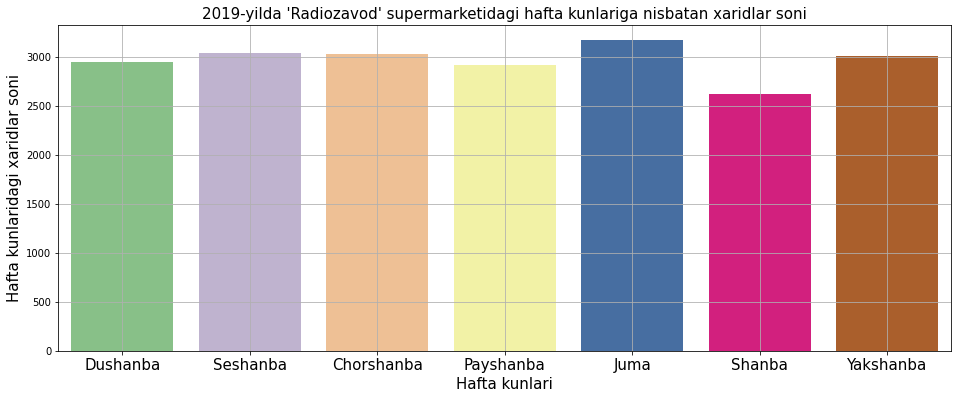

In [106]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Radiozavod' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [107]:
#14 2019-yilda "Radiozavod" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,589
2,753
3,737
4,641
5,637
6,650
7,647
8,606
9,764
10,612


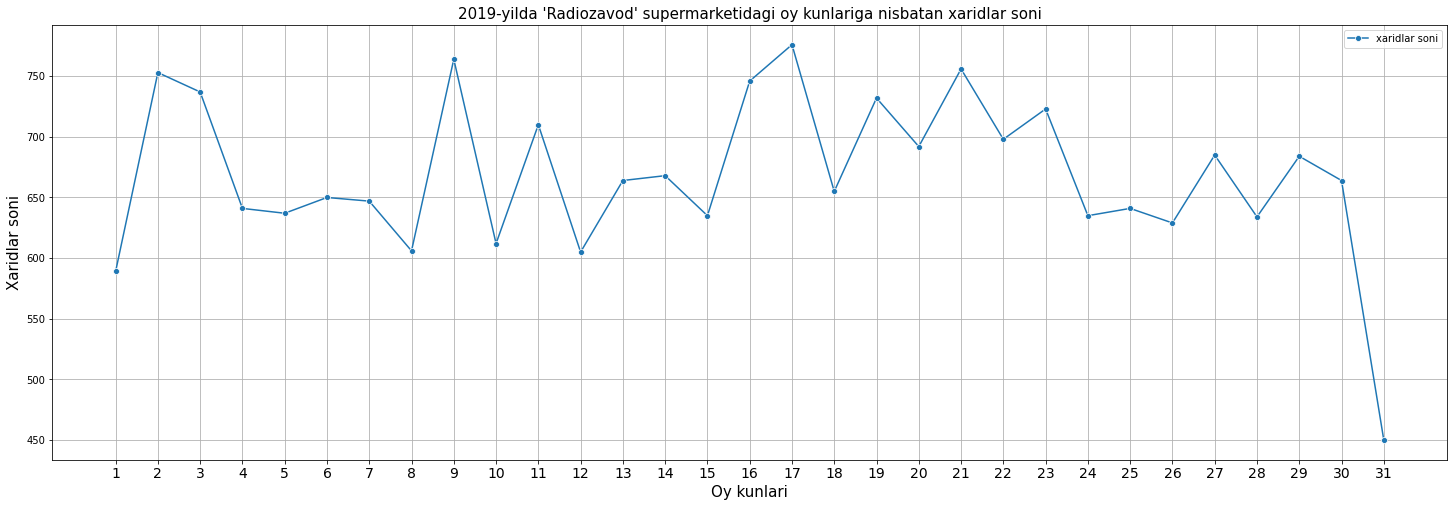

In [108]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Radiozavod' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [109]:
#15 2019-yil 'Radiozavod' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [110]:
len(oy_sanalari)

310

In [111]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [112]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [113]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,66,87,58,62,41,50,64,79,58,62,117,40,87,59,94,85,72,58,79,100,45,46,29,32,71,75,77,70,64,64,48
Fevral,41,69,82,31,67,65,73,82,80,60,93,67,73,93,55,93,84,119,110,85,59,65,88,73,78,79,62,77,0,0,0
Mart,63,59,85,78,46,60,76,56,59,63,56,43,65,42,42,78,74,73,81,60,109,50,51,88,89,66,53,55,81,56,66
Aprel,62,52,57,56,91,58,60,67,78,76,41,53,67,81,59,89,76,49,69,55,64,54,70,46,20,61,31,48,73,69,0
May,53,74,93,79,48,80,51,67,73,50,47,74,66,61,90,48,80,62,76,60,69,72,75,101,50,76,83,68,86,75,58
Iyun,18,61,105,42,36,83,77,70,68,91,102,56,78,59,83,44,86,33,54,67,85,86,80,36,94,57,62,67,34,75,0
Iyul,55,75,52,60,81,58,84,61,67,49,58,82,52,71,42,72,79,67,121,59,103,69,51,63,51,62,109,48,90,97,84
Avgust,72,100,32,55,37,52,64,51,68,44,69,61,49,79,43,113,65,78,49,108,80,96,105,76,59,38,56,68,72,98,93
Sentabr,66,75,56,91,99,103,33,31,116,61,57,68,54,38,64,40,107,42,67,62,42,97,92,45,83,53,57,69,92,31,0
Oktabr,93,101,117,87,91,41,65,42,97,56,70,61,73,85,63,84,53,74,26,36,100,63,82,75,46,62,95,64,92,99,101


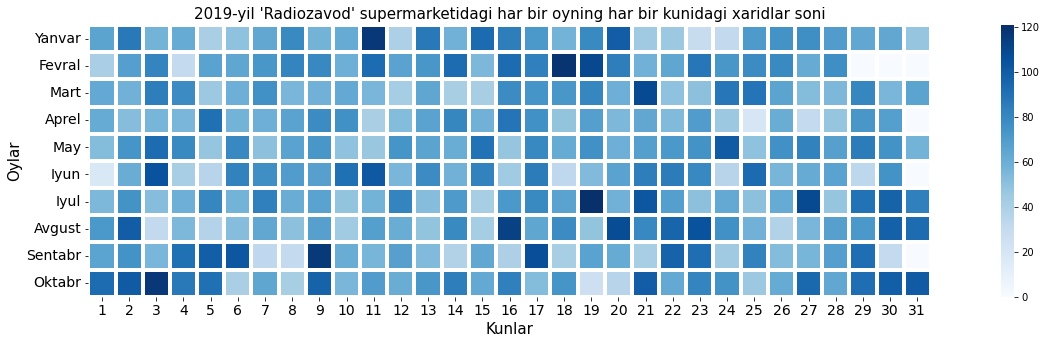

In [114]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Radiozavod' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

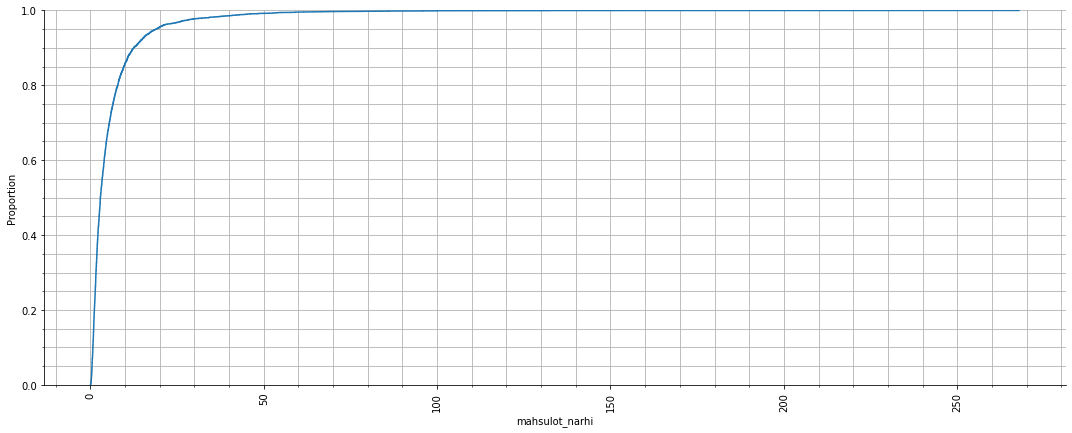

In [116]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()